# EDA

## Setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def toPercent(__data):
    for idx in __data.index:
        __data.loc[idx] = round(__data.loc[idx] / __data.loc[idx].sum() * 100)
    return

def viz_corr(col_name1, col_name2, __data):
    _tmp = __data.groupby([col_name1, col_name2]).count().reset_index()
    _tmp['num'] = _tmp['source']
    _corr = _tmp[[col_name1, col_name2, 'num']].sort_values(by=[col_name1, 'num'], ascending=False)
    _corr = _corr.pivot(col_name1, col_name2, 'num').fillna(0)
    # _corr.loc['Bán thời gian'] = round(_corr.loc['Bán thời gian'] / _corr.loc['Bán thời gian'].sum() * 100)
    toPercent(_corr)
    _corr = _corr.astype('int32')
    ax = sns.heatmap(_corr, annot=True, fmt='d', cmap="YlGnBu")
    return

def viz_corr_num(col_name1, col_name2, __data):
    _tmp = __data.groupby([col_name1, col_name2]).count().reset_index()
    _tmp['num'] = _tmp['source']
    _corr = _tmp[[col_name1, col_name2, 'num']].sort_values(by=[col_name1, 'num'], ascending=False)
    _corr = _corr.pivot(col_name1, col_name2, 'num').fillna(0)
    _corr = _corr.astype('int32')
    ax = sns.heatmap(_corr, annot=True, fmt='d', cmap="YlGnBu")
    return

def trans_data(val, col_name, trans_dict):
    res = trans_dict[col_name][val]
    return res

def get_unique(col_name, df=dataCenter):
    return list(dataCenter[col_name].unique())

def get_label_from_salary(s):
    return s['label']

## Data info

In [3]:
data_dir = "data/"

In [4]:
careerbuilder = pd.read_json(data_dir + 'careerbuilder')
mywork = pd.read_json(data_dir + 'mywork')
topcv = pd.read_json(data_dir + 'topcv')

In [5]:
cols_of_careerbuilder = ['_id', 'url', 'title', 'update_time', 'img_url', 'sectors',
       'application_deadline', 'salary', 'job_formality',
       'job_experience_years', 'required_gender_specific', 'job_attributes',
       'job_descriptions', 'job_requirements', 'company_name',
       'company_address', 'company_url', 'timestampISOdate']

cols_of_topcv = ['_id', 'url', 'title', 'img_url', 'sectors', 'application_deadline',
       'salary', 'job_attributes', 'job_formality', 'required_gender_specific',
       'job_experience_years', 'job_descriptions', 'job_requirements',
       'company_name', 'company_address', 'company_url', 'timestampISOdate']

cols = ['sectors', 'salary', 'job_attributes', 'job_formality',
       'required_gender_specific', 'job_experience_years', 'job_requirements',
       'company_name', 'company_address', 'source']

topcv['source'] = 'topcv'

dataCenter = topcv
dataCenter = dataCenter[cols]

In [6]:
dataCenter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sectors                   8973 non-null   object
 1   salary                    8973 non-null   object
 2   job_attributes            8973 non-null   object
 3   job_formality             8973 non-null   object
 4   required_gender_specific  8973 non-null   object
 5   job_experience_years      8973 non-null   object
 6   job_requirements          8973 non-null   object
 7   company_name              8973 non-null   object
 8   company_address           8973 non-null   object
 9   source                    8973 non-null   object
dtypes: object(10)
memory usage: 701.1+ KB


In [7]:
dataCenter.T

,0,1,2,3,4,5,6,7,8,9,...,8963,8964,8965,8966,8967,8968,8969,8970,8971,8972
sectors,"[Kinh doanh / Bán hàng, Tư vấn]","[Marketing / Truyền thông / Quảng cáo, Báo chí...","[Bất động sản, Kinh doanh / Bán hàng, Tư vấn]",[Sản xuất],"[Kinh doanh / Bán hàng, Bảo hiểm, Tư vấn]","[Thư ký / Trợ lý, Kinh doanh / Bán hàng, Marke...","[Kinh doanh / Bán hàng, Tư vấn, Tài chính / Đầ...","[Kế toán / Kiểm toán, Ngân hàng / Tài chính]","[Cơ khí / Chế tạo / Tự động hóa, Điện tử viễn ...","[Marketing / Truyền thông / Quảng cáo, Báo chí...",...,"[Kinh doanh / Bán hàng, Bất động sản, Tư vấn]","[Bảo hiểm, Ngân hàng / Tài chính, Tài chính / ...","[Kinh doanh / Bán hàng, Xây dựng, Kiến trúc]",[Biên / Phiên dịch],"[Kinh doanh / Bán hàng, Điện / Điện tử / Điện ...","[Hoạch định/Dự án, Thời trang]","[Kinh doanh / Bán hàng, Hành chính / Văn phòng...","[Hành chính / Văn phòng, Kế toán / Kiểm toán, ...","[Kế toán / Kiểm toán, Hành chính / Văn phòng, ...","[Kinh doanh / Bán hàng, Tư vấn, Y tế / Dược]"
salary,"{'label': '5 - 10 triệu', 'salary': '8-15 triệu'}","{'label': '5 - 10 triệu', 'salary': '8-15 triệu'}","{'label': 'Trên 30 triệu', 'salary': 'Trên 50 ...","{'label': '5 - 10 triệu', 'salary': '7-8 triệu'}","{'label': '20 - 25 triệu', 'salary': 'Trên 20 ...","{'label': '5 - 10 triệu', 'salary': '8-18 triệ...","{'label': '10 - 15 triệu', 'salary': '10-15 tr...","{'label': '10 - 15 triệu', 'salary': '12-18 tr...","{'label': '10 - 15 triệu', 'salary': '10-15 tr...","{'label': '10 - 15 triệu', 'salary': '12-20 tr...",...,"{'label': 'Trên 30 triệu', 'salary': 'Tới 200 ...","{'label': '5 - 10 triệu', 'salary': '7-21 triệu'}","{'label': '25 - 30 triệu', 'salary': '25-35 tr...","{'label': '10 - 15 triệu', 'salary': '12-20 tr...","{'label': 'Thỏa thuận', 'salary': 'Thoả thuận'}","{'label': 'Thỏa thuận', 'salary': 'Thoả thuận'}","{'label': '10 - 15 triệu', 'salary': 'Trên 10 ...","{'label': '5 - 10 triệu', 'salary': '8-10 triệu'}","{'label': '10 - 15 triệu', 'salary': '10-16 tr...","{'label': '10 - 15 triệu', 'salary': 'Tới 12 t..."
job_attributes,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,...,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian,Toàn thời gian
job_formality,Nhân viên,Nhân viên,Nhân viên,Nhân viên,Nhân viên,Nhân viên,Nhân viên,Nhân viên,Nhân viên,Nhân viên,...,Nhân viên,Nhân viên,Quản lý / Giám sát,Nhân viên,Nhân viên,Nhân viên,Nhân viên,Nhân viên,Trưởng/Phó phòng,Nhân viên
required_gender_specific,Không yêu cầu,Không yêu cầu,Không yêu cầu,Nam,Không yêu cầu,Nữ,Không yêu cầu,Không yêu cầu,Không yêu cầu,Không yêu cầu,...,Không yêu cầu,Không yêu cầu,Không yêu cầu,Không yêu cầu,Không yêu cầu,Không yêu cầu,Nữ,Nữ,Không yêu cầu,Nữ
job_experience_years,Không yêu cầu kinh nghiệm,1 năm,Không yêu cầu kinh nghiệm,Không yêu cầu kinh nghiệm,1 năm,Không yêu cầu kinh nghiệm,Dưới 1 năm,1 năm,1 năm,2 năm,...,Dưới 1 năm,1 năm,2 năm,1 năm,1 năm,1 năm,1 năm,2 năm,2 năm,1 năm
job_requirements,- Trình độ: từ trung cấp trở lên- Sinh năm 199...,Có sự đam mê đối với hướng ngành SEO - Content...,- Nam/nữ ngoại hình ưa nhìn.- Đam mê với công ...,- Ứng viên tốt nghiệp Cao đẳng/Đại học các chu...,- Độ tuổi từ 25-45\n- Trình độ Trung Cấp trở l...,Giới tính: NữTốt nghiệp cử nhân chuyên ngành l...,- Giao tiếp tốt- Ưu tiên ứng viên có kinh nghi...,Tốt nghiệp Cao đẳng- Đại học chuyên ngành kế t...,Tốt nghiệp Cao đẳng/ Đại học chuyên ngành kỹ t...,-\tNam/ Nữ tốt nghiệp Cao đẳng trở lên các chu...,...,"- Nam/ Nữ tuổi từ 20 – 30, trình độ từ trung c...","• Trình độ: Cao đẳng, Đại Học trở lên. • Giới ...",-\tGiới tính: Nam. Tuổi từ 28 - 40.\n-\tTốt ng...,"Kỹ năng tiếng Anh giỏi, giao tiếp tốt, có tính...","• Có tối thiểu 1 năm kinh nghiệm bán hàng, kin...","− Có laptop cá nhân\n− Có kỹ năng chụp ảnh, sử...",- Tốt nghiệp Đại học/ Cao đẳng ngành kinh tế- ...,- 1 năm kinh nghiệm trở lên ở vị trí tương đ

In [9]:
category_cols = ['job_attributes', 'job_formality', 'required_gender_specific',
                 'job_experience_years']

for col in category_cols:
    print(col, "______", get_unique(col, dataCenter))

job_attributes ______ ['Toàn thời gian', 'Remote - Làm việc từ xa', 'Bán thời gian', 'Thực tập']
job_formality ______ ['Nhân viên', 'Trưởng nhóm', 'Trưởng/Phó phòng', 'Quản lý / Giám sát', 'Giám đốc', 'Thực tập sinh', 'Phó giám đốc', 'Trưởng chi nhánh']
required_gender_specific ______ ['Không yêu cầu', 'Nam', 'Nữ']
job_experience_years ______ ['Không yêu cầu kinh nghiệm', '1 năm', 'Dưới 1 năm', '2 năm', '3 năm', '5 năm', '4 năm', 'Trên 5 năm']


## Standard

In [11]:
dataCenter['salary_label'] = dataCenter['salary'].apply(lambda s: get_label_from_salary(s))
dataCenter['requirements_len'] = dataCenter['job_requirements'].apply(lambda r: len(r))

/home/vinbdi/anaconda3/envs/grey/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
category_cols = ['salary_label', 'job_attributes', 'job_formality', 
                 'required_gender_specific',
                 'job_experience_years']

for col in category_cols:
    print(col, "\n______", get_unique(col, dataCenter))

salary_label 
______ ['5 - 10 triệu', 'Trên 30 triệu', '20 - 25 triệu', '10 - 15 triệu', 'Thỏa thuận', '15 - 20 triệu', '25 - 30 triệu', 'Dưới 5 triệu']
job_attributes 
______ ['Toàn thời gian', 'Remote - Làm việc từ xa', 'Bán thời gian', 'Thực tập']
job_formality 
______ ['Nhân viên', 'Trưởng nhóm', 'Trưởng/Phó phòng', 'Quản lý / Giám sát', 'Giám đốc', 'Thực tập sinh', 'Phó giám đốc', 'Trưởng chi nhánh']
required_gender_specific 
______ ['Không yêu cầu', 'Nam', 'Nữ']
job_experience_years 
______ ['Không yêu cầu kinh nghiệm', '1 năm', 'Dưới 1 năm', '2 năm', '3 năm', '5 năm', '4 năm', 'Trên 5 năm']


In [14]:
salary_mean = {
    '5 - 10 triệu', 
    'Trên 30 triệu', 
    '20 - 25 triệu', 
    '10 - 15 triệu', 
    'Thỏa thuận', 
    '15 - 20 triệu', 
    '25 - 30 triệu', 
    'Dưới 5 triệu'
}

## Statistic

### Viz with count

In [15]:
_data = dataCenter[['salary_label']]
_data

,salary_label
0,5 - 10 triệu
1,5 - 10 triệu
2,Trên 30 triệu
3,5 - 10 triệu
4,20 - 25 triệu
...,...
8968,Thỏa thuận
8969,10 - 15 triệu
8970,5 - 10 triệu
8971,10 - 15 triệu


<AxesSubplot:>

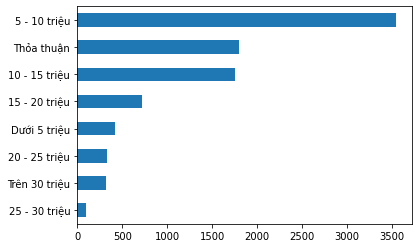

In [16]:
dataCenter['salary_label'].value_counts().sort_values(ascending=True).plot(kind="barh")

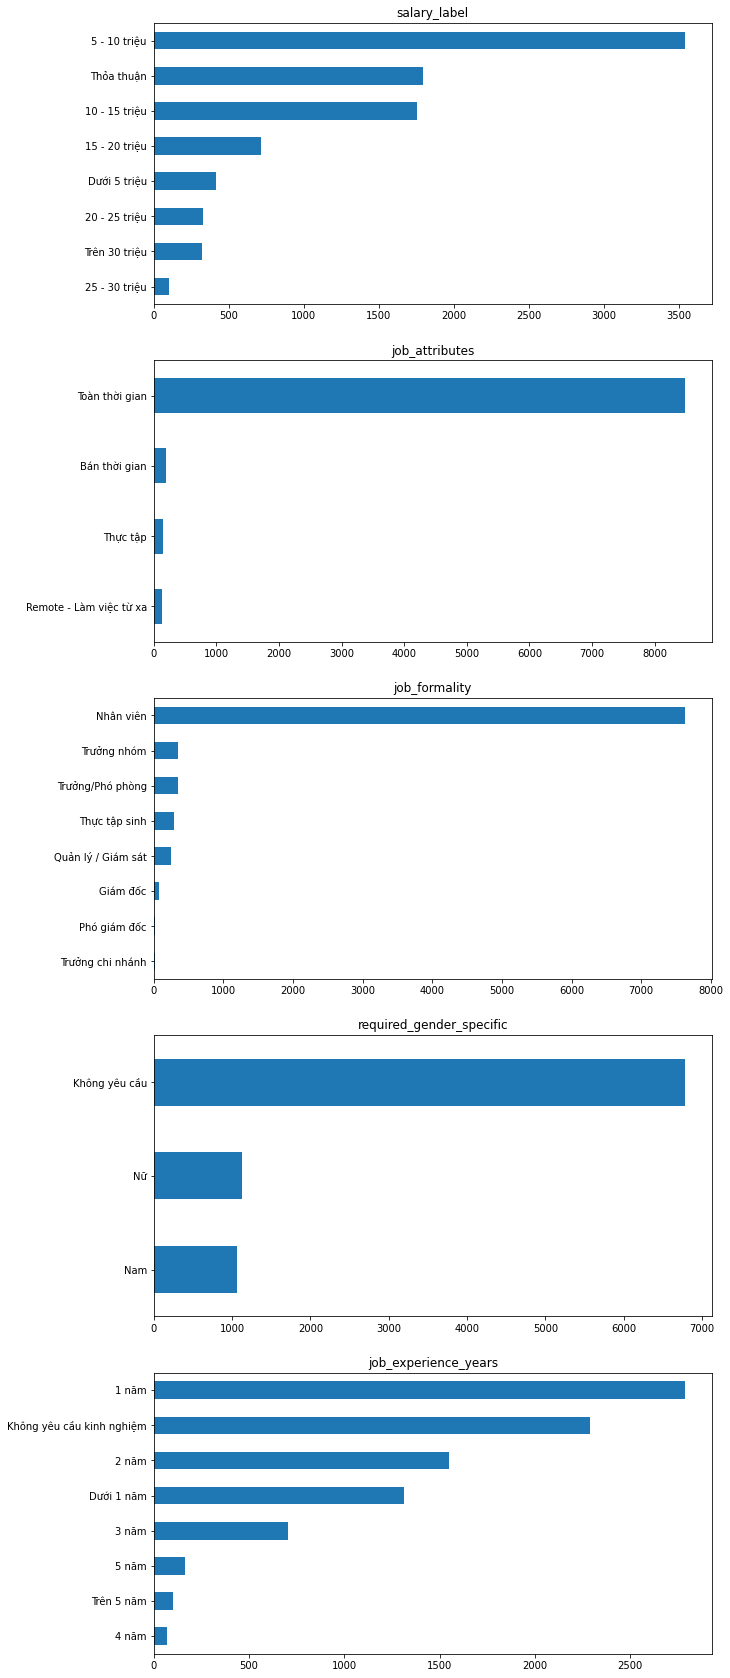

In [17]:
figure, axes = plt.subplots(round(len(category_cols)), 1)

for idx, col in enumerate(category_cols):
    dataCenter[col].value_counts().sort_values(ascending=True).plot(kind="barh", ax=axes[idx], figsize=(10, 30), title=col)


In [18]:
# dataCenter.hist(bins=50, figsize=(20, 15))

### Viz corr

In [19]:
trans_dict = {}

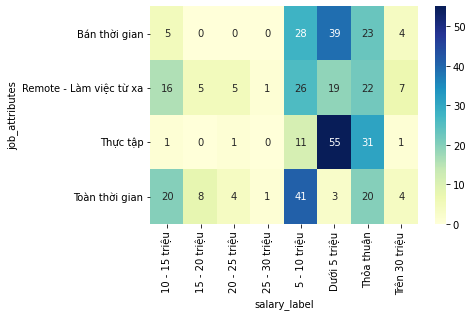

In [20]:
viz_corr('job_attributes', 'salary_label', dataCenter)

> Thuc tap < Ban thoi gian < Remote < Toan thoi gian

In [21]:
# job_attributes
trans_dict['job_attributes'] = {
    'Thực tập': 1,
    'Bán thời gian': 2, 
    'Toàn thời gian': 3, 
    'Remote - Làm việc từ xa': 4
}

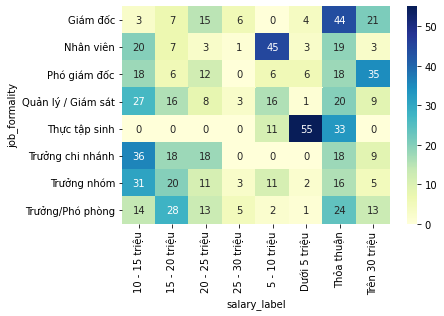

In [22]:
viz_corr('job_formality', 'salary_label', dataCenter)

> Thuc tap sinh < Nhan vien < Truong chi nhanh < Truong nhom < Quan ly/Giam sat < Truong/pho phong < Pho giam doc < Giam doc

In [23]:
# job_formality
trans_dict['job_formality'] = {
    'Thực tập sinh': 1, 
    'Nhân viên': 2, 
    'Trưởng chi nhánh': 3,
    'Trưởng nhóm': 4, 
    'Quản lý / Giám sát': 5, 
    'Trưởng/Phó phòng': 6, 
    'Phó giám đốc': 7, 
    'Giám đốc': 8
}

> 

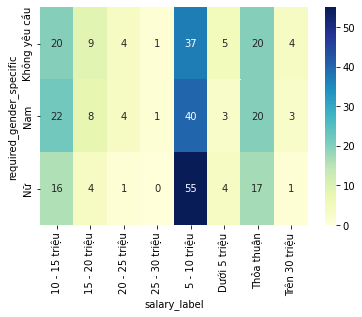

In [24]:
viz_corr('required_gender_specific', 'salary_label', dataCenter)

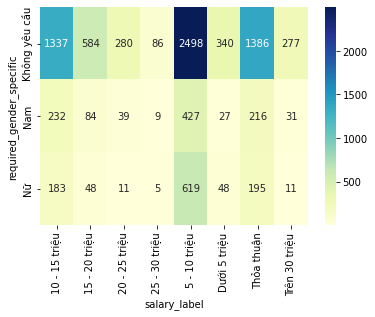

In [25]:
viz_corr_num('required_gender_specific', 'salary_label', dataCenter)

> Nu < Khong yeu cau < Nam

In [26]:
# required_gender_specific
trans_dict['required_gender_specific'] = {
    'Nữ': 1,
    'Không yêu cầu': 2,
    'Nam': 3
}

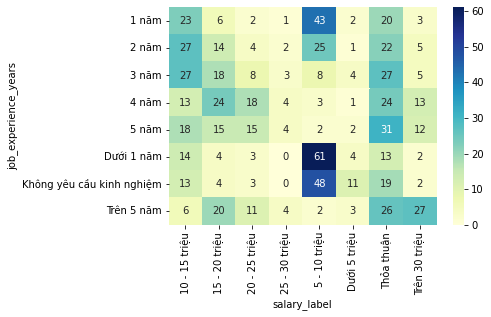

In [27]:
viz_corr('job_experience_years', 'salary_label', dataCenter)

> Duoi 1 nam < Khong yeu cau < 1 nam < 2 nam < 3 nam < 4 nam < 5 nam < Tren 5 nam

In [28]:
# job_experience_years
trans_dict['job_experience_years'] = {
    'Dưới 1 năm': 1, 
    'Không yêu cầu kinh nghiệm': 2, 
    '1 năm': 3, 
    '2 năm': 4, 
    '3 năm': 5, 
    '4 năm': 6, 
    '5 năm': 7, 
    'Trên 5 năm': 8
}

## Preprocess

In [29]:
category_cols = ['salary_label', 'job_attributes', 'job_formality', 
                 'required_gender_specific',
                 'job_experience_years']

for col in category_cols:
    print(col, "\n______", get_unique(col, dataCenter))

salary_label 
______ ['5 - 10 triệu', 'Trên 30 triệu', '20 - 25 triệu', '10 - 15 triệu', 'Thỏa thuận', '15 - 20 triệu', '25 - 30 triệu', 'Dưới 5 triệu']
job_attributes 
______ ['Toàn thời gian', 'Remote - Làm việc từ xa', 'Bán thời gian', 'Thực tập']
job_formality 
______ ['Nhân viên', 'Trưởng nhóm', 'Trưởng/Phó phòng', 'Quản lý / Giám sát', 'Giám đốc', 'Thực tập sinh', 'Phó giám đốc', 'Trưởng chi nhánh']
required_gender_specific 
______ ['Không yêu cầu', 'Nam', 'Nữ']
job_experience_years 
______ ['Không yêu cầu kinh nghiệm', '1 năm', 'Dưới 1 năm', '2 năm', '3 năm', '5 năm', '4 năm', 'Trên 5 năm']


### Salary label Dict

In [30]:
trans_dict['salary_label'] = {
    'Thỏa thuận': 0, 
    'Dưới 5 triệu': 1,
    '5 - 10 triệu': 2, 
    '10 - 15 triệu': 3, 
    '15 - 20 triệu': 4, 
    '20 - 25 triệu': 5, 
    '25 - 30 triệu': 6, 
    'Trên 30 triệu': 7
}

In [31]:
__data = dataCenter.copy()

In [32]:
encoded_data = __data[category_cols]
for col in encoded_data.columns:
    try:
        encoded_data[col] = encoded_data[col].apply(lambda x: trans_data(x,col,trans_dict))
    except:
        print(col)
encoded_data

/home/vinbdi/anaconda3/envs/grey/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,salary_label,job_attributes,job_formality,required_gender_specific,job_experience_years
0,2,3,2,2,2
1,2,3,2,2,3
2,7,3,2,2,2
3,2,3,2,3,2
4,5,3,2,2,3
...,...,...,...,...,...
8968,0,3,2,2,3
8969,3,3,2,1,3
8970,2,3,2,1,4
8971,3,3,6,2,4


In [33]:
# features = ['job_attributes', 'job_formality', 
#             'required_gender_specific',
#             'job_experience_years']

# for f in features:
#     encoded_data[f] = encoded_data[f] / encoded_data[f].max()
# encoded_data

## Train

In [34]:
pred = encoded_data[encoded_data['salary_label'] == 0]
train = encoded_data[encoded_data['salary_label'] != 0]

In [35]:
# train-test split evaluation random forest on the sonar dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = train.drop(columns=['salary_label'])
y = train['salary_label']

print('Shape:',X.shape, y.shape)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print('Shape:',X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# fit the model
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
# make predictions
yhat = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

Shape: (7176, 4) (7176,)
Shape: (5023, 4) (2153, 4) (5023,) (2153,)
Accuracy: 0.571


## Predict

In [36]:
X_pred = pred.drop(columns=['salary_label'])
X_pred['salary_label'] = model.predict(X_pred)
X_pred

,job_attributes,job_formality,required_gender_specific,job_experience_years,salary_label
10,3,4,2,3,3
17,3,2,2,3,2
27,3,2,2,3,2
44,3,4,2,3,3
47,3,6,2,5,4
...,...,...,...,...,...
8944,3,2,1,1,2
8946,3,2,3,4,3
8955,3,8,3,7,7
8967,3,2,2,3,2


In [37]:
encoded_data

,salary_label,job_attributes,job_formality,required_gender_specific,job_experience_years
0,2,3,2,2,2
1,2,3,2,2,3
2,7,3,2,2,2
3,2,3,2,3,2
4,5,3,2,2,3
...,...,...,...,...,...
8968,0,3,2,2,3
8969,3,3,2,1,3
8970,2,3,2,1,4
8971,3,3,6,2,4


In [38]:
pred_data = encoded_data.copy()
pred_data['salary_prediction'] = pred_data['salary_label']
for i in X_pred.index:
    pred_data.loc[i]['salary_prediction'] = X_pred.loc[i]['salary_label']
pred_data

,salary_label,job_attributes,job_formality,required_gender_specific,job_experience_years,salary_prediction
0,2,3,2,2,2,2
1,2,3,2,2,3,2
2,7,3,2,2,2,7
3,2,3,2,3,2,2
4,5,3,2,2,3,5
...,...,...,...,...,...,...
8968,0,3,2,2,3,2
8969,3,3,2,1,3,3
8970,2,3,2,1,4,2
8971,3,3,6,2,4,3


In [39]:
__pred_data = encoded_data.copy()
__pred_data['salary_prediction'] = 0
for i in X_pred.index:
    __pred_data.loc[i]['salary_prediction'] = X_pred.loc[i]['salary_label']
__pred_data

,salary_label,job_attributes,job_formality,required_gender_specific,job_experience_years,salary_prediction
0,2,3,2,2,2,0
1,2,3,2,2,3,0
2,7,3,2,2,2,0
3,2,3,2,3,2,0
4,5,3,2,2,3,0
...,...,...,...,...,...,...
8968,0,3,2,2,3,2
8969,3,3,2,1,3,0
8970,2,3,2,1,4,0
8971,3,3,6,2,4,0


## Fill database

In [40]:
trans_dict['inverse_salary_label'] = {
    0:'Không',
    1:'Dưới 5 triệu',
    2:'5 - 10 triệu', 
    3:'10 - 15 triệu', 
    4:'15 - 20 triệu', 
    5:'20 - 25 triệu', 
    6:'25 - 30 triệu', 
    7:'Trên 30 triệu'
}

__data = dataCenter.copy()
__data

__data['salary_prediction'] = __pred_data['salary_prediction']
__data['salary_prediction'] = __data['salary_prediction'].replace(trans_dict['inverse_salary_label'])
__data

,sectors,salary,job_attributes,job_formality,required_gender_specific,job_experience_years,job_requirements,company_name,company_address,source,salary_label,requirements_len,salary_prediction
0,"[Kinh doanh / Bán hàng, Tư vấn]","{'label': '5 - 10 triệu', 'salary': '8-15 triệu'}",Toàn thời gian,Nhân viên,Không yêu cầu,Không yêu cầu kinh nghiệm,- Trình độ: từ trung cấp trở lên- Sinh năm 199...,Công ty TNHH HUDATECH VIỆT NAM,"64 Nguyễn Khuyến, Văn Quán, Hà Đông",topcv,5 - 10 triệu,118,Không
1,"[Marketing / Truyền thông / Quảng cáo, Báo chí...","{'label': '5 - 10 triệu', 'salary': '8-15 triệu'}",Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,Có sự đam mê đối với hướng ngành SEO - Content...,CÔNG TY TNHH SẢN XUẤT THƯƠNG MẠI DỊCH VỤ SAO V...,"Số NO18-LK18-30, Khu đất dịch vụ Dọc Bún 2, Ph...",topcv,5 - 10 triệu,431,Không
2,"[Bất động sản, Kinh doanh / Bán hàng, Tư vấn]","{'label': 'Trên 30 triệu', 'salary': 'Trên 50 ...",Toàn thời gian,Nhân viên,Không yêu cầu,Không yêu cầu kinh nghiệm,- Nam/nữ ngoại hình ưa nhìn.- Đam mê với công ...,CÔNG TY CỔ PHẦN GAMUDA LAND (HCMC),"68 Đường N1, Phường Sơn Kỳ, Quận Tân Phú, Thàn...",topcv,Trên 30 triệu,109,Không
3,[Sản xuất],"{'label': '5 - 10 triệu', 'salary': '7-8 triệu'}",Toàn thời gian,Nhân viên,Nam,Không yêu cầu kinh nghiệm,- Ứng viên tốt nghiệp Cao đẳng/Đại học các chu...,Công ty TNHH sản xuất bột mỳ Vimaflour,"KCN Cái Lân, Phường Bãi Cháy, Thành phố Hạ Long",topcv,5 - 10 triệu,281,Không
4,"[Kinh doanh / Bán hàng, Bảo hiểm, Tư vấn]","{'label': '20 - 25 triệu', 'salary': 'Trên 20 ...",Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,- Độ tuổi từ 25-45\n- Trình độ Trung Cấp trở l...,CÔNG TY TNHH BẢO HIỂM NHÂN THỌ AIA VIỆT NAM - ...,"Tầng 15 Tòa nhà Lotte số 2 Đào Tấn, Ba Đình, H...",topcv,20 - 25 triệu,301,Không
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,"[Hoạch định/Dự án, Thời trang]","{'label': 'Thỏa thuận', 'salary': 'Thoả thuận'}",Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,"− Có laptop cá nhân\n− Có kỹ năng chụp ảnh, sử...",Công ty CP Coziland,"46 Nguyễn Thị Minh Khai, Phường Đa Kao, Quận 1...",topcv,Thỏa thuận,205,5 - 10 triệu
8969,"[Kinh doanh / Bán hàng, Hành chính / Văn phòng...","{'label': '10 - 15 triệu', 'salary': 'Trên 10 ...",Toàn thời gian,Nhân viên,Nữ,1 năm,- Tốt nghiệp Đại học/ Cao đẳng ngành kinh tế- ...,Công ty TNHH Kỹ Thuật Thương Mai Thái Khương,30D Phan Văn Sửu phường 13 quận Tân Bình,topcv,10 - 15 triệu,364,Không
8970,"[Hành chính / Văn phòng, Kế toán / Kiểm toán, ...","{'label': '5 - 10 triệu', 'salary': '8-10 triệu'}",Toàn thời gian,Nhân viên,Nữ,2 năm,- 1 năm kinh nghiệm trở lên ở vị trí tương đươ...,Công Ty TNHH A Sóc,"Lô V6B-20 phố Victoria khu đô thị Văn Phú, Phư...",topcv,5 - 10 triệu,160,Không
8971,"[Kế toán / Kiểm toán, Hành chính / Văn phòng, ...","{'label': '10 - 15 triệu', 'salary': '10-16 tr...",Toàn thời gian,Trưởng/Phó phòng,Không yêu cầu,2 năm,- Kinh nghiệm từ 2 năm trở lên- Khả năng chịu ...,Công Ty TNHH Thương Mại Và Sản Xuất MIT,"41/17đường 35, P. Hiệp Bình Chánh, TP. Thủ Đức",topcv,10 - 15 triệu,89,Không


## Ranking

In [41]:
pred_data

,salary_label,job_attributes,job_formality,required_gender_specific,job_experience_years,salary_prediction
0,2,3,2,2,2,2
1,2,3,2,2,3,2
2,7,3,2,2,2,7
3,2,3,2,3,2,2
4,5,3,2,2,3,5
...,...,...,...,...,...,...
8968,0,3,2,2,3,2
8969,3,3,2,1,3,3
8970,2,3,2,1,4,2
8971,3,3,6,2,4,3


In [42]:
ranked_data = pred_data.copy()

a = 111
b = -11
c = -9

ranked_data['overall_score']\
    = a*ranked_data['salary_prediction']\
    + b*ranked_data['job_experience_years']\
    + c*ranked_data['required_gender_specific']

ranked_data

,salary_label,job_attributes,job_formality,required_gender_specific,job_experience_years,salary_prediction,overall_score
0,2,3,2,2,2,2,182
1,2,3,2,2,3,2,171
2,7,3,2,2,2,7,737
3,2,3,2,3,2,2,173
4,5,3,2,2,3,5,504
...,...,...,...,...,...,...,...
8968,0,3,2,2,3,2,171
8969,3,3,2,1,3,3,291
8970,2,3,2,1,4,2,169
8971,3,3,6,2,4,3,271


In [43]:
__data['overall_score'] = ranked_data['overall_score']
__data = __data.sort_values(by='overall_score', ascending=False).reset_index(drop=True)
__data

,sectors,salary,job_attributes,job_formality,required_gender_specific,job_experience_years,job_requirements,company_name,company_address,source,salary_label,requirements_len,salary_prediction,overall_score
0,"[Bất động sản, Bảo hiểm, Chứng khoán / Vàng / ...","{'label': 'Trên 30 triệu', 'salary': 'Trên 30 ...",Toàn thời gian,Nhân viên,Không yêu cầu,Dưới 1 năm,"- Nghiêm túc trong công việc.- Chăm chỉ, nhanh...",Công ty CPTM Địa ốc 5 sao Quảng Ninh,"C1-06 KĐT Marine Plaza, P Hùng Thắng, TP Hạ...",topcv,Trên 30 triệu,209,Không,748
1,"[Kinh doanh / Bán hàng, Bất động sản, Tư vấn]","{'label': 'Trên 30 triệu', 'salary': 'Tới 50 t...",Toàn thời gian,Nhân viên,Không yêu cầu,Dưới 1 năm,Có Laptop cá nhân.\nKhông yêu cầu kinh nghiệm...,Tập Đoàn Danh Khôi,105-107 Đường Nguyễn Công Trứ Phường Nguyễn Th...,topcv,Trên 30 triệu,281,Không,748
2,"[Tư vấn, Bất động sản, Dịch vụ khách hàng]","{'label': 'Trên 30 triệu', 'salary': 'Tới 30 t...",Toàn thời gian,Nhân viên,Không yêu cầu,Dưới 1 năm,- Chịu khó học hỏi- Không có kinh nghiệm sẽ đư...,CÔNG TY CỔ PHẦN BẤT ĐỘNG SẢN FIRSTHOME,"Số 36 Đường số 6, Khu dân cư Him Lam, Phường T...",topcv,Trên 30 triệu,286,Không,748
3,"[Kinh doanh / Bán hàng, Bảo hiểm, Hành chính /...","{'label': 'Trên 30 triệu', 'salary': 'Tới 50 t...",Bán thời gian,Trưởng/Phó phòng,Không yêu cầu,Dưới 1 năm,- Từ 25 tuổi trở lên. Có từ 1 năm kinh ...,Công ty TNHH Bảo hiểm nhân thọ MB Ageas (MB Ag...,"27 Trần Phú, TP Thái Bình",topcv,Trên 30 triệu,731,Không,748
4,"[Quản lý điều hành, Công nghệ cao, Marketing /...","{'label': 'Trên 30 triệu', 'salary': 'Trên 200...",Toàn thời gian,Nhân viên,Không yêu cầu,Dưới 1 năm,At least 1 year of experience as the Community...,Công ty TNHH Widi Tech,"Tầng 22F, Khu B, Tòa nhà HH4, Khu đô thị Mỹ Đì...",topcv,Trên 30 triệu,344,Không,748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,[Nhân sự],"{'label': 'Dưới 5 triệu', 'salary': 'Tới 1,500...",Toàn thời gian,Trưởng/Phó phòng,Không yêu cầu,5 năm,• Proven working experience as HR Manager or H...,Công ty Cổ phẩn Lotus Quality Assurance,"Tầng 14 -17 , toà nhà văn phòng MD Complex, 68...",topcv,Dưới 5 triệu,519,Không,16
8969,"[Thời trang, Công nghệ thông tin]","{'label': 'Dưới 5 triệu', 'salary': '2,000-2,5...",Toàn thời gian,Trưởng nhóm,Nam,5 năm,Skills and abilitiesMust have● Code: Can write...,Swop Company,6 Võ Văn Kiệt Quận 1,topcv,Dưới 5 triệu,1579,Không,7
8970,"[Kế toán / Kiểm toán, Ngân hàng / Tài chính, T...","{'label': 'Dưới 5 triệu', 'salary': 'Tới 2,500...",Toàn thời gian,Quản lý / Giám sát,Không yêu cầu,Trên 5 năm,Requirement:• Education: Graduate in finance/a...,Công ty cổ phần phương tiện điện thông minh Selex,"Nhà E4, Ngõ 18 Mạc Thái Tổ, Cầu Giấy, Hà Nội",topcv,Dưới 5 triệu,819,Không,5
8971,"[Kinh doanh / Bán hàng, Thời trang, Bán lẻ / b...","{'label': 'Dưới 5 triệu', 'salary': '1,500-2,5...",Toàn thời gian,Giám đốc,Không yêu cầu,Trên 5 năm,• Previous experience and/or qualifications in...,Công ty TNHH thời trang Elise,"Tầng 8, Số 2 Tôn Thất Tùng, Đống Đa, Hà Nội",topcv,Dưới 5 triệu,611,Không,5


# Test

In [54]:
__test = pred_data.copy()

In [55]:
a = 111
b = -11
c = -9

__test['overall_score']\
    = a*__test['salary_prediction']\
    + b*__test['job_experience_years']\
    + c*__test['required_gender_specific']

__test = __test.sort_values(by='overall_score', ascending=False).reset_index(drop=True)
__test

,salary_label,job_attributes,job_formality,required_gender_specific,job_experience_years,salary_prediction,overall_score
0,7,3,2,2,1,7,748
1,7,3,2,2,1,7,748
2,7,3,2,2,1,7,748
3,7,2,6,2,1,7,748
4,7,3,2,2,1,7,748
...,...,...,...,...,...,...,...
8968,1,3,6,2,7,1,16
8969,1,3,4,3,7,1,7
8970,1,3,5,2,8,1,5
8971,1,3,8,2,8,1,5


In [46]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
def viz_category(data, col_name):
    category_values = dataCenter.pivot_table(columns=[col_name], aggfunc='size')

    category_names = dataCenter[col_name]
    categories = category_names.unique()
    categories.sort()
    plt.pie(category_values, labels=categories)

    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()

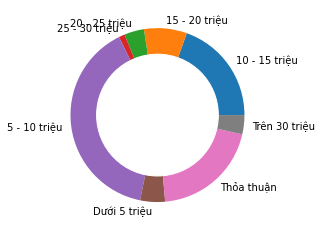

In [48]:
viz_category(dataCenter, 'salary_label')

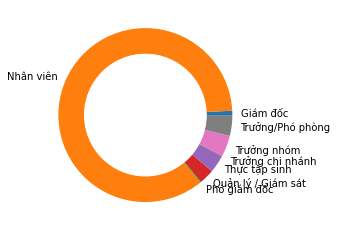

In [49]:
viz_category(dataCenter, 'job_formality')

In [50]:
# dataCenter['salary_label'].plot(kind='bar', title='test')

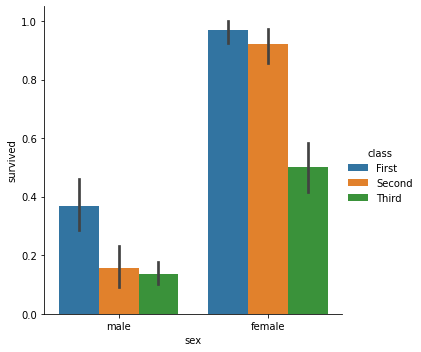

In [51]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

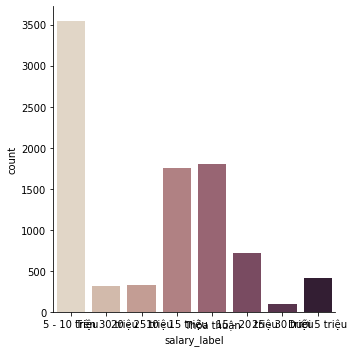

In [52]:
sns.catplot(x="salary_label", kind="count", palette="ch:.25", data=dataCenter, orient="v")